# Mercari NLP

In [20]:
#Standard imports
import pandas as pd
import os
import sys
import string
import re
import numpy as np

#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#SKlearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

#NLTK
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer, sent_tokenize
from nltk import WordNetLemmatizer # lemmatizer using WordNet
from nltk.corpus import wordnet # imports WordNet
from nltk import pos_tag # nltk's native part of speech tagging

## Preproccessing

In [2]:
topic_df = pd.read_csv("/Users/javm/Desktop/Mercari-Price-Prediction-Project/topic")

In [3]:
topic_df.isna().sum()

name                       0
item_condition_id          0
category_name              0
price                      0
shipping                   0
item_description           0
brand_mention_True         0
compound_sentiment_desc    0
clothing                   0
beauty products            0
women's clothing           0
accessories                0
electronics                0
dtype: int64

In [4]:
topic_df['category_name'] = topic_df['category_name'].str.replace('/', ' ')

In [16]:
topic_df

,name,item_condition_id,category_name,price,shipping,item_description,brand_mention_True,compound_sentiment_desc,clothing,beauty products,women's clothing,accessories,electronics
0,Nike air max! Size 13 in men,3,Men Shoes Athletic,46.0,1,Great color blue navy and gold! In great condi...,1,0.8925,0.000000,0.0,0.308205,0.691795,0.000000
1,On Hold For Chelsie Bower,3,Women Sweaters Hooded,28.0,0,Ladies XL Under Armour Storm Hoodie Like new c...,1,0.0772,0.131890,0.0,0.023092,0.845019,0.000000
2,OASICS GEL RUNNING SHOES 8,4,Women Shoes Athletic,16.0,0,Barely used shoes but still works,1,0.0000,0.000000,0.0,0.295137,0.704863,0.000000
3,2 bracelets,2,Women Jewelry Bracelets,45.0,1,Juste du Clau ( nail bracelets) is rose gold.....,1,0.6380,0.000000,0.0,0.000000,1.000000,0.000000
4,Very Sexy 32dd Crystal Push Up Bra,1,Women Underwear Bras,24.0,0,Victoria's Secret BNWT Red rhinestone crystals...,1,0.8122,0.019099,0.0,0.000000,0.980901,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,Rae Dunn I woke up like this,1,Home Kitchen & Dining Coffee & Tea Accessories,34.0,0,New set of two mugs Will ship with bubble wrap...,1,0.8364,0.000000,0.0,0.000000,0.032007,0.967993
249996,⚡free shipping bebe top⚡,3,Women Tops & Blouses Blouse,10.0,1,Size S in great condition. Authentic There's a...,1,0.8442,1.000000,0.0,0.000000,0.000000,0.000000
249997,Michael Kors boots size 7,3,Women Shoes Boots,40.0,1,Brown leather Gold hardware Worn one time but ...,1,0.2960,0.000000,0.0,0.000000,1.000000,0.000000
249998,Clemson shirt,2,Women Tops & Blouses T-Shirts,14.0,0,Women's clemson shirt Size medium Never worn,0,0.2235,0.983723,0.0,0.000000,0.016277,0.000000


In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from nltk import WordNetLemmatizer # lemmatizer using WordNet
from nltk.corpus import wordnet # imports WordNet
from nltk import pos_tag # nltk's native part of speech tagging

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [14]:
class TextPreprocessor(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        
        pass
    
    def fit(self, data, y = 0):
        
        return self
    
    def transform(self, data, y = 0):
        fully_normalized_corpus = data.apply(self.process_doc)
        
        return fully_normalized_corpus
        
    def process_doc(self, doc):

        wnl = WordNetLemmatizer()
        stop_words = stopwords.words('english')
        
        def pos_tagger(nltk_tag):
            if nltk_tag.startswith('J'):
                return wordnet.ADJ
            elif nltk_tag.startswith('V'):
                return wordnet.VERB
            elif nltk_tag.startswith('N'):
                return wordnet.NOUN
            elif nltk_tag.startswith('R'):
                return wordnet.ADV
            else:         
                return None

        doc_norm = [tok.lower() for tok in word_tokenize(doc) if ((tok.isalpha()) & (tok not in stop_words)) ]

        wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm))) 
        doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]

        return " ".join(doc_norm)

In [9]:
proc = TextPreprocessor()

In [10]:
df1 = proc.fit_transform(topic_df['item_description'])

In [11]:
df1

0         great color blue navy gold great condition sma...
1         lady xl armour storm hoodie new condition wear...
2                                barely use shoe still work
3         juste du clau nail bracelet rise gold love bra...
4         victoria secret bnwt red rhinestone crystal se...
                                ...                        
249995    new set mug ship bubble wrap extreme care plea...
249996    size s great condition there little bit tear b...
249997    leather gold hardware time live warmer climate...
249998           woman clemson shirt size medium never wear
249999    authentic good condition use swatched bunch ti...
Name: item_description, Length: 250000, dtype: object

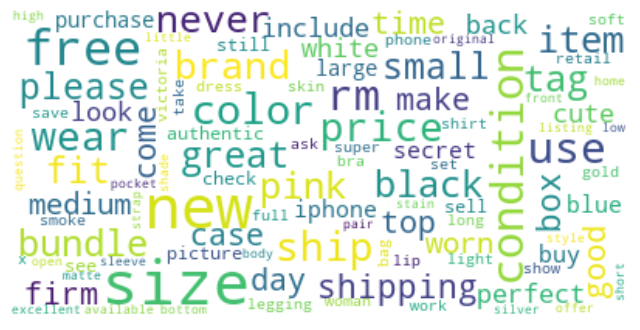

In [12]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
text = ''.join(i for i in df1)
wordcloud = WordCloud(stopwords = stopwords, max_font_size=40, collocations=False, background_color='white', max_words = 100).generate(text)
plt.figure( figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
df2 = proc.fit_transform(topic_df['category_name'])

In [21]:
df3 = proc.fit_transform(topic_df['name'])

In [22]:
df12 = df1.str.cat(df2, sep = ' ')

In [23]:
df123 = df12.str.cat(df3, sep = ' ')

In [24]:
df123

0         great color blue navy gold great condition sma...
1         lady xl armour storm hoodie new condition wear...
2         barely use shoe still work woman shoe athletic...
3         juste du clau nail bracelet rise gold love bra...
4         victoria secret bnwt red rhinestone crystal se...
                                ...                        
249995    new set mug ship bubble wrap extreme care plea...
249996    size s great condition there little bit tear b...
249997    leather gold hardware time live warmer climate...
249998    woman clemson shirt size medium never wear wom...
249999    authentic good condition use swatched bunch ti...
Name: item_description, Length: 250000, dtype: object

In [25]:
#total_description_df= pd.Series(["df123"],name="total_description")
total_description_df = df123.to_frame()

In [26]:
total_description_df.rename(columns ={'item_description' : 'total_description'}, inplace = True)

In [27]:
total_description_df

,total_description
0,great color blue navy gold great condition sma...
1,lady xl armour storm hoodie new condition wear...
2,barely use shoe still work woman shoe athletic...
3,juste du clau nail bracelet rise gold love bra...
4,victoria secret bnwt red rhinestone crystal se...
...,...
249995,new set mug ship bubble wrap extreme care plea...
249996,size s great condition there little bit tear b...
249997,leather gold hardware time live warmer climate...
249998,woman clemson shirt size medium never wear wom...


In [28]:
total_description_df.to_csv('vec_df',index=False)

In [29]:
vec_df = pd.read_csv('/Users/javm/Desktop/Mercari-Price-Prediction-Project/vec_df')

In [30]:
vec_df

,total_description
0,great color blue navy gold great condition sma...
1,lady xl armour storm hoodie new condition wear...
2,barely use shoe still work woman shoe athletic...
3,juste du clau nail bracelet rise gold love bra...
4,victoria secret bnwt red rhinestone crystal se...
...,...
249995,new set mug ship bubble wrap extreme care plea...
249996,size s great condition there little bit tear b...
249997,leather gold hardware time live warmer climate...
249998,woman clemson shirt size medium never wear wom...


In [31]:
df = pd.concat([topic_df, total_description_df], axis = 1, join = 'inner')
df

,name,item_condition_id,category_name,price,shipping,item_description,brand_mention_True,compound_sentiment_desc,clothing,beauty products,women's clothing,accessories,electronics,total_description
0,Nike air max! Size 13 in men,3,Men Shoes Athletic,46.0,1,Great color blue navy and gold! In great condi...,1,0.8925,0.000000,0.0,0.308205,0.691795,0.000000,great color blue navy gold great condition sma...
1,On Hold For Chelsie Bower,3,Women Sweaters Hooded,28.0,0,Ladies XL Under Armour Storm Hoodie Like new c...,1,0.0772,0.131890,0.0,0.023092,0.845019,0.000000,lady xl armour storm hoodie new condition wear...
2,OASICS GEL RUNNING SHOES 8,4,Women Shoes Athletic,16.0,0,Barely used shoes but still works,1,0.0000,0.000000,0.0,0.295137,0.704863,0.000000,barely use shoe still work woman shoe athletic...
3,2 bracelets,2,Women Jewelry Bracelets,45.0,1,Juste du Clau ( nail bracelets) is rose gold.....,1,0.6380,0.000000,0.0,0.000000,1.000000,0.000000,juste du clau nail bracelet rise gold love bra...
4,Very Sexy 32dd Crystal Push Up Bra,1,Women Underwear Bras,24.0,0,Victoria's Secret BNWT Red rhinestone crystals...,1,0.8122,0.019099,0.0,0.000000,0.980901,0.000000,victoria secret bnwt red rhinestone crystal se...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,Rae Dunn I woke up like this,1,Home Kitchen & Dining Coffee & Tea Accessories,34.0,0,New set of two mugs Will ship with bubble wrap...,1,0.8364,0.000000,0.0,0.000000,0.032007,0.967993,new set mug ship bubble wrap extreme care plea...
249996,⚡free shipping bebe top⚡,3,Women Tops & Blouses Blouse,10.0,1,Size S in great condition. Authentic There's a...,1,0.8442,1.000000,0.0,0.000000,0.000000,0.000000,size s great condition there little bit tear b...
249997,Michael Kors boots size 7,3,Women Shoes Boots,40.0,1,Brown leather Gold hardware Worn one time but ...,1,0.2960,0.000000,0.0,0.000000,1.000000,0.000000,leather gold hardware time live warmer climate...
249998,Clemson shirt,2,Women Tops & Blouses T-Shirts,14.0,0,Women's clemson shirt Size medium Never worn,0,0.2235,0.983723,0.0,0.000000,0.016277,0.000000,woman clemson shirt size medium never wear wom...


In [32]:
ready_df = df.drop(['name', 'category_name', 'item_description'], axis=1)

ready_df

,item_condition_id,price,shipping,brand_mention_True,compound_sentiment_desc,clothing,beauty products,women's clothing,accessories,electronics,total_description
0,3,46.0,1,1,0.8925,0.000000,0.0,0.308205,0.691795,0.000000,great color blue navy gold great condition sma...
1,3,28.0,0,1,0.0772,0.131890,0.0,0.023092,0.845019,0.000000,lady xl armour storm hoodie new condition wear...
2,4,16.0,0,1,0.0000,0.000000,0.0,0.295137,0.704863,0.000000,barely use shoe still work woman shoe athletic...
3,2,45.0,1,1,0.6380,0.000000,0.0,0.000000,1.000000,0.000000,juste du clau nail bracelet rise gold love bra...
4,1,24.0,0,1,0.8122,0.019099,0.0,0.000000,0.980901,0.000000,victoria secret bnwt red rhinestone crystal se...
...,...,...,...,...,...,...,...,...,...,...,...
249995,1,34.0,0,1,0.8364,0.000000,0.0,0.000000,0.032007,0.967993,new set mug ship bubble wrap extreme care plea...
249996,3,10.0,1,1,0.8442,1.000000,0.0,0.000000,0.000000,0.000000,size s great condition there little bit tear b...
249997,3,40.0,1,1,0.2960,0.000000,0.0,0.000000,1.000000,0.000000,leather gold hardware time live warmer climate...
249998,2,14.0,0,0,0.2235,0.983723,0.0,0.000000,0.016277,0.000000,woman clemson shirt size medium never wear wom...


In [33]:
prc_steps = [('tfid', TfidfVectorizer(max_features = 2000))]
tfid_pipeline = Pipeline(prc_steps)

In [34]:
processed_text = tfid_pipeline.fit_transform(df['total_description'])

In [35]:
processed_text

<250000x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 4292416 stored elements in Compressed Sparse Row format>

In [36]:
# feat_names = tfid_pipeline['tfid'].get_feature_names()

word_vec = pd.DataFrame(processed_text.toarray())


In [37]:
word_vec

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084942,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187885
249996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
249997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
249998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [38]:
ready_df

,item_condition_id,price,shipping,brand_mention_True,compound_sentiment_desc,clothing,beauty products,women's clothing,accessories,electronics,total_description
0,3,46.0,1,1,0.8925,0.000000,0.0,0.308205,0.691795,0.000000,great color blue navy gold great condition sma...
1,3,28.0,0,1,0.0772,0.131890,0.0,0.023092,0.845019,0.000000,lady xl armour storm hoodie new condition wear...
2,4,16.0,0,1,0.0000,0.000000,0.0,0.295137,0.704863,0.000000,barely use shoe still work woman shoe athletic...
3,2,45.0,1,1,0.6380,0.000000,0.0,0.000000,1.000000,0.000000,juste du clau nail bracelet rise gold love bra...
4,1,24.0,0,1,0.8122,0.019099,0.0,0.000000,0.980901,0.000000,victoria secret bnwt red rhinestone crystal se...
...,...,...,...,...,...,...,...,...,...,...,...
249995,1,34.0,0,1,0.8364,0.000000,0.0,0.000000,0.032007,0.967993,new set mug ship bubble wrap extreme care plea...
249996,3,10.0,1,1,0.8442,1.000000,0.0,0.000000,0.000000,0.000000,size s great condition there little bit tear b...
249997,3,40.0,1,1,0.2960,0.000000,0.0,0.000000,1.000000,0.000000,leather gold hardware time live warmer climate...
249998,2,14.0,0,0,0.2235,0.983723,0.0,0.000000,0.016277,0.000000,woman clemson shirt size medium never wear wom...


In [39]:
forest_df = pd.concat([ready_df, word_vec], axis =1,join='inner')

In [40]:
forest_df.drop(['total_description'], axis = 1,inplace = True)

In [41]:
forest_df.to_csv('sample_before_train_test', index = False)ß

In [ ]:
forest_df = pd.read_csv("/Users/javm/Desktop/Mercari-Price-Prediction-Project/sample_before_train_test")

In [42]:
forest_df

,item_condition_id,price,shipping,brand_mention_True,compound_sentiment_desc,clothing,beauty products,women's clothing,accessories,electronics,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,3,46.0,1,1,0.8925,0.000000,0.0,0.308205,0.691795,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,3,28.0,0,1,0.0772,0.131890,0.0,0.023092,0.845019,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,4,16.0,0,1,0.0000,0.000000,0.0,0.295137,0.704863,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,2,45.0,1,1,0.6380,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,1,24.0,0,1,0.8122,0.019099,0.0,0.000000,0.980901,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,1,34.0,0,1,0.8364,0.000000,0.0,0.000000,0.032007,0.967993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.187885
249996,3,10.0,1,1,0.8442,1.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
249997,3,40.0,1,1,0.2960,0.000000,0.0,0.000000,1.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
249998,2,14.0,0,0,0.2235,0.983723,0.0,0.000000,0.016277,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
forest_df['item_condition_id'].value_counts()

1    44114
3    28426
2    25165
4     2146
5      149
Name: item_condition_id, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

y = forest_df['price']
X = forest_df.drop(columns = ['price'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

## Gridsearch

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
param_grid = {'n_estimators': [175, 200, 225],
              'max_depth': [40,50,60]}  
rfr = RandomForestRegressor(max_features= 'sqrt')

grid = GridSearchCV(rfr, param_grid, refit = True, verbose = 3, n_jobs =1 ) 
    
grid.fit(X_train, y_train) 
  
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
    
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=40, n_estimators=175 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=40, n_estimators=175, score=0.275, total= 1.1min
[CV] max_depth=40, n_estimators=175 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ...... max_depth=40, n_estimators=175, score=0.312, total= 1.1min
[CV] max_depth=40, n_estimators=175 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.2min remaining:    0.0s


[CV] ...... max_depth=40, n_estimators=175, score=0.305, total= 1.2min
[CV] max_depth=40, n_estimators=175 ..................................
[CV] ...... max_depth=40, n_estimators=175, score=0.312, total= 1.3min
[CV] max_depth=40, n_estimators=175 ..................................
[CV] ...... max_depth=40, n_estimators=175, score=0.344, total= 1.1min
[CV] max_depth=40, n_estimators=200 ..................................
[CV] ...... max_depth=40, n_estimators=200, score=0.277, total= 1.3min
[CV] max_depth=40, n_estimators=200 ..................................
[CV] ...... max_depth=40, n_estimators=200, score=0.316, total= 1.3min
[CV] max_depth=40, n_estimators=200 ..................................
[CV] ...... max_depth=40, n_estimators=200, score=0.306, total= 1.3min
[CV] max_depth=40, n_estimators=200 ..................................
[CV] ...... max_depth=40, n_estimators=200, score=0.319, total= 1.3min
[CV] max_depth=40, n_estimators=200 ..................................
[CV] .

In [ ]:
# 1st try (n_est = 200, max_depth = 40)


## HistGradientBoosting

In [177]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [197]:
hist_params = {"model__learning_rate" : [0.1, 0.15, 0.2, 0.25],
               "model__max_iter": [215, 220, 225, 230, 245],
               "model__min_samples_leaf": [1, 3, 5],
               "model__max_leaf_nodes" : [29, 31, 33, 35],
               "model__max_depth" : [17, 19, 21, 23, 25]}

In [198]:
hist = HistGradientBoostingRegressor(hist_params, random_state = 42, verbose = 2)

In [199]:
hist.fit(X_train,y_train)

ValueError: Loss {'model__learning_rate': [0.1, 0.15, 0.2, 0.25], 'model__max_iter': [215, 220, 225, 230, 245], 'model__min_samples_leaf': [1, 3, 5], 'model__max_leaf_nodes': [29, 31, 33, 35], 'model__max_depth': [17, 19, 21, 23, 25]} is not supported for HistGradientBoostingRegressor. Accepted losses: least_squares, least_absolute_deviation, poisson.

In [120]:
y_predict = hist.predict(X_test)

In [124]:
hist.score(X_train,y_train)

0.5228122613517541

In [125]:
hist.score(X_test,y_test)

0.31825314275392236

In [21]:
sns.scatterplot(y_test,y_predict)

NameError: name 'y_test' is not defined

## Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
rf = RandomForestRegressor(random_state = 42)

In [99]:
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [100]:
rf.score(X_train,y_train)

0.907013293119612

In [101]:
rf.score(X_test,y_test)

0.2732062525883895

In [102]:
y_pred = rf.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [103]:
rf.feature_importances_

array([1.87092517e-02, 6.97217030e-03, 1.57474487e-02, ...,
       1.89602219e-04, 5.77646898e-05, 1.24683022e-04])

In [65]:
#rf.feature_importances_

array([1.28407647e-02, 1.80885926e-02, 6.73640022e-03, ...,
       1.66882211e-04, 1.93655455e-05, 1.08684856e-04])

In [ ]:
# plt.plot(aapl['Close'].to_numpy(), label='Close')

TypeError: 'value' must be an instance of str or bytes, not a int

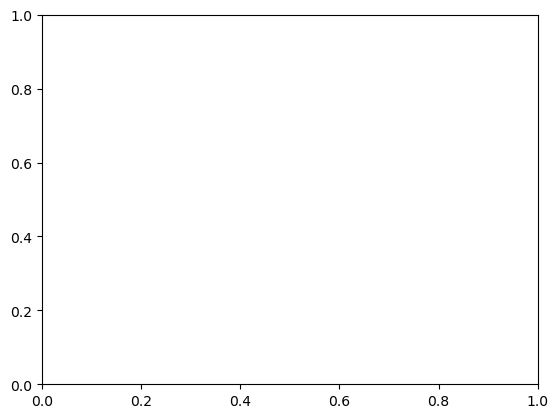

In [74]:
plt.barh(feature_names, rf.feature_importances_)

## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr = LogisticRegression(random_state = 42)

In [49]:
lr.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

 ## Define Sigmoid

In [ ]:
def sigmoid(z):
    s = 1/1(1+np.exp(-z))
    
    return s

def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0
    
    assert(s.shape == (dim, 1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [ ]:
X_train.shape

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [ ]:
# Original OG CNN
model = Sequential()
model.add(Input(shape= (number of dimensions in data)))
model.add(Dense(128, activation=‘relu’))
model_reg.add(Dropout(0.2))
model.add(Dense(128, activation=‘relu’))
model.add(Dense(64, activation=‘relu’))
model_reg.add(Dropout(0.2))
model.add(Dense(32, activation=‘relu’))
model.add(Dense(1, activation=‘sigmoid’))
model.compile(loss=‘binary_crossentropy’,
              optimizer=‘adam’, metrics=‘accuracy’)
model.summary()


In [ ]:
#Feature of CNN if not enough information by 'patience' epocs, shut it down
trainCallback = EarlyStopping(monitor=‘loss’, min_delta = 1e-6, patience = 20)

In [ ]:
# Fit into CNN   
base = model.fit(X_train,  y_train, epochs = 50, 
                 batch_size = 128, validation_size=0.2 , callbacks=[trainCallback], verbose =1)

In [ ]:
#Graphing   
sns.set()
acc = base.history[‘accuracy’]
val = base.history[‘val_accuracy’]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, ‘-’, label=‘Training accuracy’)
plt.plot(epochs, val, ‘:’, label=‘Validation accuracy’)
plt.title(‘Training and Validation Accuracy’)
plt.xlabel(‘Epoch’)
plt.ylabel(‘Accuracy’)
plt.legend(loc=‘lower right’)
plt.plot()

In [ ]:
#this is optimized for a binary classifier and is a cnn, to do a baseline i would just have one hidden layer:
#more simpler model:
model = Sequential()
model.add(Input(shape= (number of dimensions in data)))
model.add(Dense(128, activation=‘relu’))
model.add(Dense(1, activation=‘sigmoid’))
model.compile(loss=‘binary_crossentropy’,
              optimizer=‘adam’, metrics=‘accuracy’)
model.summary()